<h2> World Bicycles Sales Analysis</h2>

<b> By Michael Kumakech</b>

<b> Import Libaries</b>

In [2]:
!pip install lxml

     |████████████████████████████████| 6.3 MB 4.5 MB/s eta 0:00:01


In [75]:
import requests
import lxml.html as lh
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

<b> grap data from the website</b>

In [76]:
bicycle = 'https://www.worldometers.info/bicycles/' #assign the wiki page
#WHO_url = 'https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases'

page = requests.get(bicycle) # create a handle to for contents of the wiki page

doc = lh.fromstring(page.content) # store content of the wiki page under doc

tr_elements = doc.xpath('//tr') # parse data stored between tr in the html

[len(T) for T in tr_elements[:12]] # check the length of the first 12 row

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

<b> Check the table header</b>

In [77]:
tr_elements = doc.xpath('//tr') # parse first row as header

col = [] # create empty list
i = 0

for t in tr_elements[0]: # for each row, store each first element (header) and an empty list
    i+=1
    name=t.text_content()
    print("%d:%s" % (i,name))
    col.append((name,[]))

1:Country 
2:Quantity
3:Year


<b> Check the data in other rows</b>

In [78]:
for j in range(1,len(tr_elements)): # Because header is the first row, data would be store in the subsequent rows.
    T = tr_elements[j] #T is j'th row
    
    if len(T)!=3: #if row is not size 3, //tr data is not from the table.
        break
        
    i = 0 #i is the index of the first column
    
    for t in T.iterchildren(): #iterate through each element of the row
        data=t.text_content()
            
        col[i][1].append(data) #append the data to the empty list of the i'th column
            
        i+=1 #increment i for the next column

<b> To see the No of Rows and Columns</b>

In [79]:
[len(C) for (title,C) in col]

[25, 25, 25]

<b> Create a dataframe and read the file</b>

In [80]:
Dict = {title:column for (title,column) in col}
df = pd.DataFrame(Dict)

In [81]:
df.head()

,Country,Quantity,Year
0,,,
1,China,"450,000,000",1992
2,USA,"100,000,000",1995
3,Japan,"72,540,000",1996
4,Germany,"62,000,000",1996


In [82]:
df.tail()

,Country,Quantity,Year
20,Switzerland,"3,800,000",1996
21,Hungary,"3,500,000",1995
22,Australia,"3,300,000",1995
23,Finland,"3,250,000",1995
24,Norway,"3,000,000",1995


In [83]:
df.shape

(25, 3)

<h2> Clean the Data</h2>

<b> Remove row 0</b>

In [133]:
dfc =df.drop([df.index[0]])
dfc.head()

,Country,Quantity,Year
1,China,"450,000,000",1992
2,USA,"100,000,000",1995
3,Japan,"72,540,000",1996
4,Germany,"62,000,000",1996
5,India,"30,800,000",1990


<b> Replace the Symbol , with an empty space in Quantity and convert the string to float</b>

In [134]:
#dfc['Quantity'].str.replace(',','').astype(int)
dfc['Quantity'] = dfc.Quantity.str.replace(',', '').astype(float)
dfc.head()

,Country,Quantity,Year
1,China,450000000.0,1992
2,USA,100000000.0,1995
3,Japan,72540000.0,1996
4,Germany,62000000.0,1996
5,India,30800000.0,1990


In [135]:
dfc.dtypes

Country      object
Quantity    float64
Year         object
dtype: object

<b> convert Year and Quantity back to Int</b>

In [136]:
dfc['Year'] = dfc.Year.astype(int)
dfc['Quantity'] = dfc.Quantity.astype(int)

dfc.head()

,Country,Quantity,Year
1,China,450000000,1992
2,USA,100000000,1995
3,Japan,72540000,1996
4,Germany,62000000,1996
5,India,30800000,1990


In [137]:
dfc.dtypes

Country     object
Quantity     int64
Year         int64
dtype: object

In [138]:
dfc.tail()

,Country,Quantity,Year
20,Switzerland,3800000,1996
21,Hungary,3500000,1995
22,Australia,3300000,1995
23,Finland,3250000,1995
24,Norway,3000000,1995


<h2> Plot Chars and Graphs</h2>

<h2> 1. Categorical variables</h2>


<b> A. Let's look at the relationship between "Year" and "Quantity" </b>

In [139]:
!pip install seaborn

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='Year', ylabel='Quantity'>

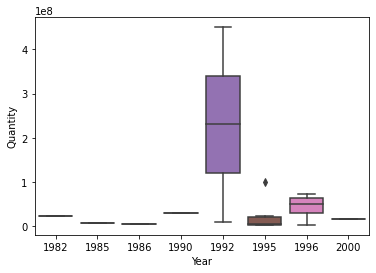

In [141]:
sns.boxplot(x="Year", y="Quantity", data=dfc)

Text(0.5, 1.0, 'Bicycles sales')

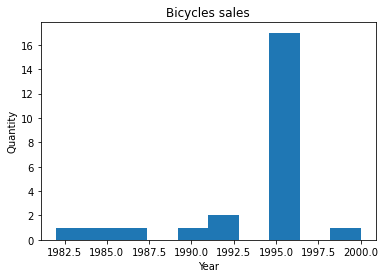

In [143]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(dfc["Year"])

# set x/y labels and plot title
plt.pyplot.xlabel("Year")
plt.pyplot.ylabel("Quantity")
plt.pyplot.title("Bicycles sales")